In [24]:
# Step 1: Clone the repository
!git clone https://github.com/tkorsi/T3-ML-ENGNEER-AMMA.git


fatal: destination path 'T3-ML-ENGNEER-AMMA' already exists and is not an empty directory.


In [39]:
import pandas as pd
import numpy as np

# Read data from the Excel file
data = pd.read_excel('T3-ML-ENGNEER-AMMA/data/raw_data.xlsx')

In [40]:
print('Data shape:', data.shape)
print(data.head())

Data shape: (63231, 34)
                timestamp      x1        x2        x3  x4  x5  x6  x7  \
0 2020-03-16 00:01:11.974  medium  1.199567  0.198783   2   0  19 -25   
1 2020-03-16 00:01:20.332  medium  1.338867  0.138917  16   0  22 -14   
2 2020-03-16 00:01:27.014  medium  1.450233  0.111100 -16   1   9 -16   
3 2020-03-16 00:01:36.200  medium  1.603333  0.152917 -21  16   9 -25   
4 2020-03-16 00:01:39.376  medium  1.656267  0.052800  -1  11  14 -16   

         x8        x9  ...  x24  x25        x26      x27     x28      x29  \
0  24500000  36550000  ...  0.0  0.0  18.136364        0       0   500000   
1  19000000  40000000  ...  0.0  0.0  17.421686  1500000       0  2000000   
2  15500000  28200000  ...  0.0  0.0  17.503649        0       0  3500000   
3  19500000  33100000  ...  0.0  0.0  15.133758        0  500000   500000   
4  14900000  28368000  ...  0.0  0.0  17.166666        0       0  1000000   

   x30  x31      x32      x33  
0    0    0  1500000  -47.261  
1    0    

In [41]:
print(data.tail())

                    timestamp      x1         x2        x3  x4  x5  x6  x7  \
63226 2020-03-20 20:04:03.486  medium  1204.0581  0.644683 -25  -3   4 -44   
63227 2020-03-20 20:05:09.638  medium  1205.1606  1.102483  -6  -9  10 -16   
63228 2020-03-20 20:05:41.640  medium  1205.6940  0.533117  13   1  16  -6   
63229 2020-03-20 20:05:56.036  medium  1205.9340  0.239050   3   1  19 -22   
63230 2020-03-20 20:06:34.735  medium  1206.5789  0.644533 -11  -6   3 -22   

             x8        x9  ...       x24       x25        x26      x27  \
63226  42025000  47934000  ...  0.495798  0.705882  15.017858        0   
63227  34000000  41437000  ...  0.369748  0.632353  14.126373        0   
63228  18900000  30270000  ...  0.487395  0.693467  14.468966        0   
63229  20000000  34170000  ...  0.521008  0.698413  11.739130  1500000   
63230  13000000  37501000  ...  0.378151  0.608466  11.669291        0   

           x28      x29  x30  x31      x32     x33  
63226        0  1500000    0    0

# Перевіримо що дані в отсортированому порядку і що розриви між таймстемпами не такі великі

In [42]:
if not np.issubdtype(data['timestamp'].dtype, np.datetime64):
  data['timestamp'] = pd.to_datetime(data['timestamp'])

is_sorted = data['timestamp'].is_monotonic_increasing
print(f"Data is sorted by 'timestamp': {is_sorted}")

time_diffs = data['timestamp'].diff()

# Exclude the first NaT value resulting from diff()
time_diffs = time_diffs[1:]

average_time_diff = time_diffs.mean()

print(f"Average time difference between rows: {average_time_diff}")

Data is sorted by 'timestamp': True
Average time difference between rows: 0 days 00:00:06.609564463


In [36]:
data = data.drop(['timestamp'], axis=1)
print('Data shape:', data.shape)


Data shape: (63231, 33)


In [ ]:
# Check for missing values
print(data.isnull().sum())

x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
x15    0
x16    0
x17    0
x18    0
x19    0
x20    0
x21    0
x22    0
x23    0
x24    0
x25    0
x26    0
x27    0
x28    0
x29    0
x30    0
x31    0
x32    0
x33    0
dtype: int64


# Чудово! Оскільки в даних немає відсутніх значень у жодній з колонок, можна продовжувати


In [ ]:
# Get unique categories in x1
categories = data['x1'].unique()
num_categories = len(categories)
print(f'Number of categories in x1: {num_categories}')
print(f'Categories: {categories}')



Number of categories in x1: 3
Categories: ['medium' 'low' 'high']


In [ ]:
# One-hot encode the 'x1' column
data = pd.get_dummies(data, columns=['x1'])


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit the scaler to the data and transform
data_scaled = scaler.fit_transform(data)

# Convert the scaled data back to a DataFrame
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

# Формування вхідних наборів даних



In [ ]:
import numpy as np

sequence_length = 32
X = []
y = []

for i in range(len(data_scaled) - sequence_length):
    X.append(data_scaled.iloc[i:i+sequence_length].values)
    y.append(data_scaled.iloc[i+sequence_length].values)

X = np.array(X)
y = np.array(y)

print('X shape:', X.shape)  # Expected: (samples, 32, num_features)
print('y shape:', y.shape)  # Expected: (samples, num_features)

X shape: (63199, 32, 35)
y shape: (63199, 35)


# Цього не було в завданні, але я продемонструю як би я використовував ці данні для тренування CNN

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data without shuffling to preserve the time sequence
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False)

# Check the shapes of the splits
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (50559, 32, 35)
X_test shape: (12640, 32, 35)
y_train shape: (50559, 35)
y_test shape: (12640, 35)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

num_features = X_train.shape[2]  # Updated number of features after encoding

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu',
                 input_shape=(sequence_length, num_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(num_features))  # Output layer matching the number of features

model.compile(optimizer='adam', loss='mse')

# Display the model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 30, 64)              │           6,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 15, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 960)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50)                  │          48,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 35)                  │           1,785 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 56,619 (221.17 KB)

 Trainable params: 56,619 (221.17 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test)
)


Epoch 1/10
1580/1580 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 0.0104 - val_loss: 0.0017
Epoch 2/10
1580/1580 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0022 - val_loss: 0.0015
Epoch 3/10
1580/1580 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.0020 - val_loss: 0.0013
Epoch 4/10
1580/1580 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - loss: 0.0019 - val_loss: 0.0013
Epoch 5/10
1580/1580 ━━━━━━━━━━━━━━━━━━━━ 27s 11ms/step - loss: 0.0019 - val_loss: 0.0013
Epoch 6/10
1580/1580 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.0018 - val_loss: 0.0013
Epoch 7/10
1580/1580 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - loss: 0.0017 - val_loss: 0.0013
Epoch 8/10
1580/1580 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0018 - val_loss: 0.0013
Epoch 9/10
1580/1580 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.0017 - val_loss: 0.0012
Epoch 10/10
1580/1580 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.0017 - val_loss: 0.0013


In [ ]:
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0013
Test Loss: 0.0012598680332303047


In [ ]:
y_pred = model.predict(X_test)

395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


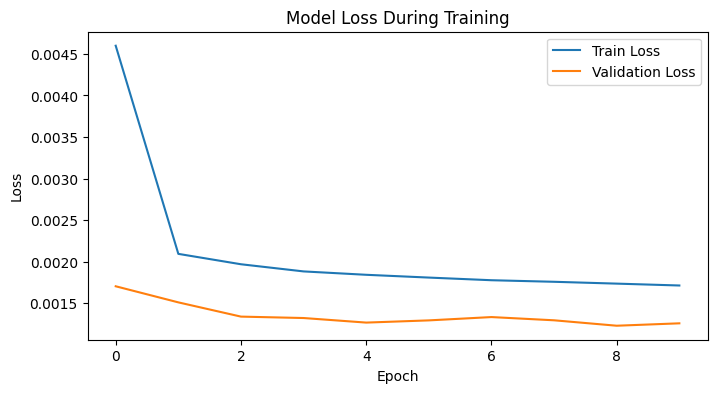

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()
